<a href="https://colab.research.google.com/github/dhruv025/twitter-sentiment-analysis/blob/master/twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

In [3]:
df1 = pd.read_csv('drive/My Drive/twitter_sentiment.csv')

In [4]:
df1.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
#independent variable
X = df1.drop(['label'],axis=1)
X

,id,tweet
0,1,@user when a father is dysfunctional and is s...
1,2,@user @user thanks for #lyft credit i can't us...
2,3,bihday your majesty
3,4,#model i love u take with u all the time in ...
4,5,factsguide: society now #motivation
...,...,...
31957,31958,ate @user isz that youuu?ðððððð...
31958,31959,to see nina turner on the airwaves trying to...
31959,31960,listening to sad songs on a monday morning otw...
31960,31961,"@user #sikh #temple vandalised in in #calgary,..."


In [6]:
#dependent variable
y = df1['label']
y

0        0
1        0
2        0
3        0
4        0
        ..
31957    0
31958    0
31959    0
31960    1
31961    0
Name: label, Length: 31962, dtype: int64

In [7]:
#shape tells the no. of rows and columns in dataset
df1.shape

(31962, 3)

In [8]:
#checking for null values
df1.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


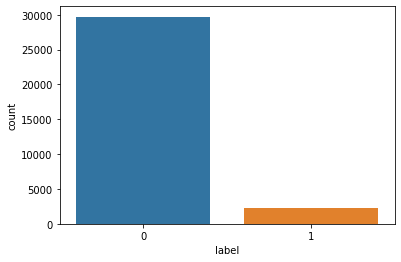

In [9]:
import seaborn as sns
sns.countplot(x='label',data=df1)

In [10]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
#data preprocessing and feature engineering
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(len(df1)):
  review = re.sub('[^a-zA-Z]',' ',df1['tweet'][i])
  review = review.lower()
  review = review.split()
  review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)
corpus

['user father dysfunctional selfish drag kid dysfunction run',
 'user user thanks lyft credit use cause offer wheelchair van pdx disapointed getthanked',
 'bihday majesty',
 'model love u take u time ur',
 'factsguide society motivation',
 'huge fan fare big talking leave chaos pay dispute get allshowandnogo',
 'user camping tomorrow user user user user user user user danny',
 'next school year year exam think school exam hate imagine actorslife revolutionschool girl',
 'love land allin cavs champion cleveland clevelandcavaliers',
 'user user welcome gr',
 'ireland consumer price index mom climbed previous may blog silver gold forex',
 'selfish orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking value love',
 'get see daddy today day gettingfed',
 'user cnn call michigan middle school build wall chant tcot',
 'comment australia opkillingbay seashepherd helpcovedolphins thecove helpcovedolphins',
 'ouch junior angry got junior yugyoem omg',
 'thankf

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
cv = CountVectorizer(max_features=12000)
X = cv.fit_transform(corpus).toarray()

In [14]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [15]:
y

0        0
1        0
2        0
3        0
4        0
        ..
31957    0
31958    0
31959    0
31960    1
31961    0
Name: label, Length: 31962, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [17]:
#training model using naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train,y_train)

In [18]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[5761,  178],
       [ 148,  306]])

In [20]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9490067261066791

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5939
           1       0.63      0.67      0.65       454

    accuracy                           0.95      6393
   macro avg       0.80      0.82      0.81      6393
weighted avg       0.95      0.95      0.95      6393



In [23]:
#this function prints and plot the confusion matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalize Confusion Matrix")
  else:
    print('Confusion matrix, without Normalization')
  thresh = cm.max() / 2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j],horizontalalignment = "center", color = "white" if cm[i,j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True values')
  plt.xlabel('Predicted values')

Confusion matrix, without Normalization


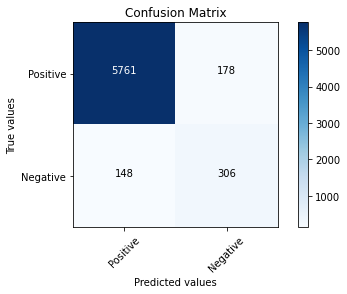

In [24]:
plot_confusion_matrix(cm,classes = ['Positive','Negative'])